# 平稳分布

给定一个马尔可夫链，若在其状态空间存在概率分布$\pmb{\pi} = \pi(\pmb{s})$，且该分布满足以下条件：
$$
\forall s_j \in \pmb{s}: \pi(s_j) = \sum_{s_i \in \pmb{s}}\pi(s_i)\pmb{P}_{ij} \Leftrightarrow \pmb{\pi} = \pmb{\pi}\pmb{P}, 0 < \pi(s_i) < 1, \mid\mid\pmb{\pi}\mid\mid=1
$$
则$\pmb{\pi}$是该马尔可夫链的平稳分布。等价号右侧的线性方程组被称为平衡方程。进一步地，若马尔可夫链的平稳分布存在，且其初始分布是平稳分布，则该马尔可夫链处于稳态。



$\pi(s_j)$相当于上一个状态为任意的$s_i$转移到$s_j$的概率之和，矩阵上对应就是第$s_i$和平稳状态分布概率$\pi(s_i)$ × 矩阵第$j$列（即i转移到j）的转移概率$P_ij$，求和就是所有状态都转移到$s_j$的总概率



**平稳分布准则**

对不可约的马尔可夫链，当且仅当其存在唯一平稳分布，即平衡方程$\pmb{\pi} = \pmb{\pi}\pmb{P}$在正单纯形上有唯一解时，该马尔可夫链是正常返的，且平稳分布有如下表示
$$
\pi(s_i) = \frac{1}{\mathbb{E}(T_i)},\mathbb{E}(T_i) = \sum_{n=1}^{\infty }n \cdot p(T_i=n)
$$

上述结论被称为平稳分布准则（stationary distribution criterion） [1] 。对不可约和常返的马尔可夫链，求解平衡方程可得到除尺度外唯一的特征向量，即[不变测度](https://baike.baidu.com/item/不变测度/18910180)（invariant measure），`若该马尔可夫链是正常返的，则其平稳分布是求解平衡方程时得到的，特征值为1时的特征向量，即归一化后的不变测度`  ，因此马尔可夫链存在平稳分布的充要条件是其存在正常返状态。




```python
import numpy as np
matrix = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
vector1 = np.matrix([[0.3,0.4,0.3]], dtype=float)
for i in range(100):
    vector1 = vector1*matrix
    print("Current round:" , i+1, vector1)
```

以上代码在第60行的时候趋于稳态,













## 极限分布

若一个马尔可夫链的状态空间存在概率分布$\pmb{\pi}$，且满足如下关系：
$$
\lim_{n \rightarrow \infty }p(X_n=s_i) = \pi(s_i)
$$
则该分布是马尔可夫链的极限分布。注意到极限分布的定义与初始分布无关，即对任意的初始分布，当时间步趋于无穷时，随机变量的概率分布趋于极限分布.


## 细致平稳条件(Gibbs采样推理依赖)

若平稳马尔可夫链对其任意两个状态满足[细致平衡](https://baike.baidu.com/item/细致平衡/12610039)（detailed balance）条件，则其具有可逆性，被称为[可逆马尔可夫链](https://baike.baidu.com/item/可逆马尔可夫链/19141263)*（reversible Markov chain）*
$$
{\pi(s_i)p(X_{n+1}=s_j|X_n=s_i) = \pi(s_j)p(X_{n+1}=s_i|X_n=s_j)\\
\Leftrightarrow \\
\pi_iP_{ij}=\pi_jP_{ji}
}
$$

# 有限状态空间内的时齐马尔可夫链

**对于一个离散状态空间，$k$步转移概率的积分即为求和，可以对转移矩阵求$k$次幂来求得。**这就是说，如果$\pmb{P}$是一步转移矩阵，$\pmb{P}^k$就是k步转移矩阵。（参考[维基百科-马尔可夫链][1], [马尔可夫链-平稳马尔可夫链][2])

要点：转移矩阵$\pmb{P}$不可约，并且非周期（对于任意某一状态i，d为集合$\{n|n \geqslant 1,p_{ii}^{n}>0\}$的最大公约数，如果$d=1$则该状态为非周期），则$\pmb{P}^k$收敛到一个每一列都是不同的平稳分布$\pi^*$，并且：
$$
\lim_{k \rightarrow \infty }\pmb{P}^k=\pi^*
$$
独立于初始分布$\pi$。这是由Perron-Frobenius theorem所指出。

代码参考:

```python
matrix = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
for i in range(10):
    matrix = matrix*matrix
    print("Current round:" , i+1)
    
    print(matrix)
```

解释：每一步转移相当与，每一列比如说：（牛，熊，震荡）转牛市的所有转换概率求和。因为他只依赖于上一个状态，所以牛转熊再转牛不用考虑，是独立的。

基于马尔可夫链采样步骤就很简单了：知道转移矩阵，以及最少状态转移次数n1（到达稳定次数）以及需要的样本数n2,于是，就很容易的到[n1, n1+n2+1]是需要的样本。**实际上，很难得到状态转移矩阵，简单的马尔可夫采样无法实用**。


# MCMC采样

从马尔可夫链细致平稳条件可知：
$$
\pi_iP_{ij}=\pi_jP_{ji}
$$
如果此时马尔可夫矩阵为Q，且不满足细致平稳条件,即$\pi_iQ_{ij} \neq \pi_jQ_{ji}$，要使其相等，则引入一个矩阵：$\alpha$
$$
\pi_i Q_{ij}\alpha_{ij} = \pi_j Q_{ji}\alpha_{ji}
$$
要使两边想等，令
$$
{
\alpha_{ij} = \pi_j Q_{ji}\\
\alpha_{ji} = \pi_i Q_{ij}
}
$$
于是，就得到新的转移矩阵$P_{ij} = Q_{ij}\alpha_{ij}$，也就是说，目标矩阵$P$可以通过转移矩阵$Q$乘以$\alpha_{ij}$得到。$\alpha_{ij}$我们一般称之为接受率，取值在[0,1]之间。理解为一个概率值。即目标矩阵P可以通过任意一个马尔科夫链状态转移矩阵Q以一定的接受率获得。

MCMC一般过程如下：

1) 输入平稳分布$\pi(x)$，以及任意的状态转移矩阵$Q$,以及状态转移阈值，需要样本数

2) 任意简单概率分布采样得到初始值$x_0$

3) for t =0 to n1+n2-1:

​	a) 从条件概率分布$Q(x|x_t)$中得到采样$x^*$

​	b）从均匀分布采样的到$u \sim uniform[0,1]$

​	c）如果$u < \alpha(x_t, x^*)=\pi(x^*, x_t)$，则接受转移$x_t \rightarrow x^*$，即$x_{t+1}=x^*$

​	d）否则不接受转移，即$x_{t+1}=x_t$

存在的问题：如果$\alpha$过小，大部分采样值都会被拒绝，则长时间采样都不会成功








# M-H采样

从MCMC细致平稳条件：$\pi_i Q_{ij}\alpha_{ij} = \pi_j Q_{ji}\alpha_{ji}$，如$\pi_i Q_{ij} * 0.1 = \pi_j Q_{ji} * 0.2$，如果两边同时* 5，仍然满足细致平稳条件，这样，接受率做如下改进：
$$
\alpha_{ij} = min\{\frac{\pi_jQ_{ji}}{\pi_iQ_{ij}}, 1\}
$$
很多时候，我们选择的马尔科夫链状态转移矩阵Q如果是对称的，即满足$Q(i,j)=Q(j,i)$,这时我们的接受率可以进一步简化为:
$$
\alpha_{ij} = min\{\frac{\pi_j}{\pi_i},1\}
$$
抽样步骤与上同，将条件换成M-H条件。

代码参考：jupyter

**问题：大数据情况下，求解min依然很难，特征维度过大时，很难求出各特征维度的联合分布。**


# Gibbs抽样

在M-H基础上升级，在固定列的维度直接抽样，不需要接受率

参考条件概率，边缘概率与联合概率关系：$p(X|Y) = \frac{p(X,Y)}{p(Y)}$

参考:[MCMC(四)Gibbs采样][5]

从二维数据角度思考：假设$\pi(x_1,x_2)$是一个二维联合分布，观察第一个纬度特征相同的点：$A(x_1^{(1)}, x_2^{(1)}), B(x_1^{(1)}, x_2^{(2)})$，参考边缘概率与条件概率关系：
$$
{
\pi(x_1^{(1)}, x_2^{(1)})\pi(x_2^{(2)}|x_1^{(1)}) = \left  [\pi(x_1^{(1)})\pi(x_2^{(2)}|x_1^{(1)})\right ]\pi(x_2^{(2)}|x_1^{(1)})\\
\pi(x_1^{(1)}, x_2^{(2)})\pi(x_2^{(1)}|x_1^{(1)}) = \left  [\pi(x_1^{(1)})\pi(x_2^{(2)}|x_1^{(1)})\right ]\pi(x_2^{(1)}|x_1^{(1)})
}
$$

两式右边想等，于是：
$$
\pi(A)\pi(x_2^{(2)}|x_1^{(1)}) = \pi(B)\pi(x_2^{(1)}|x_1^{(1)})
$$
如果固定$x_1 = x_1^{(1)}$作为马尔可夫链状态转移概率，则任意2点之间的转移都满足细致平稳条件（**点类比于马尔可夫链状态**）。同理，唯独$x_2$也成立。于是，可以构造分布：
$$
P(A \rightarrow B)=\pi(x_2^{(B)}|x_1^{(1)})\ if\ x_1^{(A)} = x_1^{(B)}=x_1^{(1)}\\
P(A \rightarrow C)=\pi(x_1^{(C)}|x_2^{(1)})\ if\ x_2^{(A)} = x_2^{(C)}=x_2^{(1)}
$$
有了上面这个状态转移矩阵，我们很容易验证平面上的任意两点$E,F$，满足细致平稳条件：
$$
\pi(E)P(E \rightarrow F) = \pi(F)P(F\rightarrow E)
$$


## 二维Gibbs采样

采样需要在2个维度进行：

1) 输入平稳分布$\pi(x_1,x_2)$，设定状态转移阈值$n_1$，需要样本数$n_2$

2）随机初始化状态值$x_1^{(0)}$和$x_2^{(0)}$

3）for t = 0 to n1+n2-1:

​	a) 从概率分布$P(x_2|x_1^{(t)})$中采样样本$x_2^{(t+1)}$

​	a) 从概率分布$P(x_1|x_2^{(t+1)})$中采样样本$x_1^{(t)}$

样本集合n1到n1+n2-1就是需要的原本。

整个采样过程是在坐标轴间轮换的。

## 多维Gibbs采样

多维采样同上，只是轮换坐标。

https://zhuanlan.zhihu.com/p/31470216 此处比较简单

# REF

https://zh.wikipedia.org/wiki/%E9%A9%AC%E5%B0%94%E5%8F%AF%E5%A4%AB%E9%93%BE	"维基百科-马尔可夫链"

https://www.cnblogs.com/pinard/p/6632399.html	"MCMC(二)马尔科夫链"

https://baike.baidu.com/item/%E9%A9%AC%E5%B0%94%E5%8F%AF%E5%A4%AB%E9%93%BE	"百度百科"

https://blog.csdn.net/lin360580306/article/details/51240398#commentBox	"随机过程–Metropolis-Hastings算法(最后例子对的)"

https://www.cnblogs.com/pinard/p/6645766.html "MCMC(四)Gibbs采样"

https://bloglxm.oss-cn-beijing.aliyuncs.com/lda-LDA%E6%95%B0%E5%AD%A6%E5%85%AB%E5%8D%A6.pdf	"LDA数学八卦"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.datasets.samples_generator import make_regression
from sklearn.datasets import make_regression
from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets.samples_generator import make_blobs

from sklearn.datasets import make_gaussian_quantiles
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

/home/hdw/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
matrix = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
vector1 = np.matrix([[0.3,0.4,0.3]], dtype=float)
for i in range(100):
    vector1 = vector1*matrix
    print("Current round:" , i+1, vector1)
    pass

Current round: 1 [[0.405  0.4175 0.1775]]
Current round: 2 [[0.4715  0.40875 0.11975]]
Current round: 3 [[0.5156 0.3923 0.0921]]
Current round: 4 [[0.54591  0.375535 0.078555]]
Current round: 5 [[0.567288 0.36101  0.071702]]
Current round: 6 [[0.5826362 0.3492801 0.0680837]]
Current round: 7 [[0.59378552 0.34014272 0.06607176]]
Current round: 8 [[0.60194632 0.33316603 0.06488765]]
Current round: 9 [[0.6079485  0.32790071 0.06415079]]
Current round: 10 [[0.61237646 0.3239544  0.06366914]]
Current round: 11 [[0.61564926 0.32100904 0.0633417 ]]
Current round: 12 [[0.61807111 0.31881635 0.06311253]]
Current round: 13 [[0.61986459 0.31718655 0.06294886]]
Current round: 14 [[0.62119333 0.3159763  0.06283037]]
Current round: 15 [[0.62217803 0.31507813 0.06274383]]
Current round: 16 [[0.62290791 0.31441182 0.06268027]]
Current round: 17 [[0.62344896 0.31391762 0.06263343]]
Current round: 18 [[0.62385006 0.31355112 0.06259882]]
Current round: 19 [[0.62414743 0.31327936 0.06257322]]
Current roun

In [4]:
matrix = np.matrix([[0.9,0.075,0.025],[0.15,0.8,0.05],[0.25,0.25,0.5]], dtype=float)
for i in range(10):
    matrix = matrix*matrix
    print("Current round:" , i+1)
    print(matrix)

Current round: 1
[[0.8275  0.13375 0.03875]
 [0.2675  0.66375 0.06875]
 [0.3875  0.34375 0.26875]]
Current round: 2
[[0.73555  0.212775 0.051675]
 [0.42555  0.499975 0.074475]
 [0.51675  0.372375 0.110875]]
Current round: 3
[[0.65828326 0.28213131 0.05958543]
 [0.56426262 0.36825403 0.06748335]
 [0.5958543  0.33741675 0.06672895]]
Current round: 4
[[0.62803724 0.30972343 0.06223933]
 [0.61944687 0.3175772  0.06297594]
 [0.6223933  0.3148797  0.062727  ]]
Current round: 5
[[0.62502532 0.31247685 0.06249783]
 [0.6249537  0.31254233 0.06250397]
 [0.62497828 0.31251986 0.06250186]]
Current round: 6
[[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
Current round: 7
[[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
Current round: 8
[[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
Current round: 9
[[0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]
 [0.625  0.3125 0.0625]]
Current round: 10
[[0.625  0.3125 0.0625]
 [0.625  0.31

我们的目标平稳分布是一个均值3，标准差2的正态分布，而选择的马尔可夫链状态转移矩阵Q(i,j)的条件转移概率是以i为均值,方差1的正态分布在位置j的值。这个例子仅仅用来让大家加深对M-H采样过程的理解。毕竟一个普通的一维正态分布用不着去用M-H采样来获得样本。


0 [-0.82568549] 0.49436375691099427 0.3560244144699254
-0.8256854891583799 [-0.52563202] 1 0.5763741886659023
-0.5256320167731365 [-2.01325369] 0.2043688288424368 0.9510776807568434
-0.5256320167731365 [0.75208612] 1 0.1482573493133691
0.7520861174395381 [0.51844575] 0.8709903900461197 0.9156787669316594
0.7520861174395381 [-0.34078392] 0.4660487435897482 0.4460185258809096
-0.3407839239013266 [-0.67203821] 0.7479804600099969 0.19992940233778878
-0.6720382106997217 [0.13891699] 1 0.7560765441583787
0.13891698964515575 [0.88789378] 1 0.631956323524893
0.8878937804815702 [0.14195457] 0.629122761598982 0.5933695471503091
0.14195457395499633 [1.25872176] 1 0.9563408489655068
1.2587217584314454 [1.80779505] 1 0.2415241815503717
1.8077950492236097 [0.64320985] 0.5965224548116322 0.6178759295557037
1.8077950492236097 [1.66740215] 0.9566592138711081 0.0791951644491472
1.66740214651974 [3.23059732] 1 0.4112788368381437
3.2305973176149503 [2.87339734] 1 0.047411246225535275
2.8733973447703036 [2

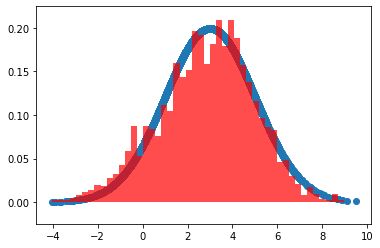

In [61]:
# M-H采样
def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))
    
    u = random.uniform(0, 1)
    print(pi[t - 1],pi_star,alpha,u)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, density=1, facecolor='red', alpha=0.7)
plt.show()

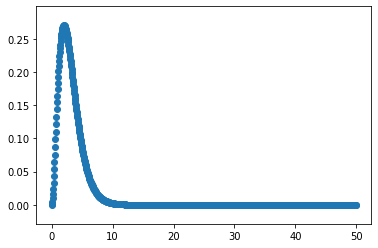

In [111]:
# 原始分布
def cal_prob(x):
    return 0.5 * x * x * math.exp(-1 * x)
x = np.arange(0,50,0.05)
y = []
for i in x:
    y.append(cal_prob(i))
plt.scatter(x, y)
plt.show()

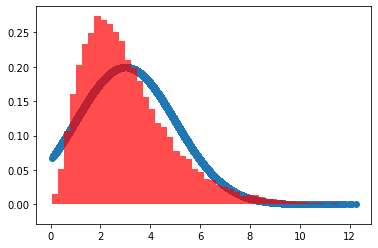

In [110]:
T = 50000
pi = [2 for i in range(T)]
sigma = 1
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)
    if pi_star[0] < 0:
        pi_star[0] = pi[t - 1]
    alpha = min(1, (cal_prob(pi_star[0]) / cal_prob(pi[t - 1])))
    
    u = random.uniform(0, 1)
    #print(pi_star, pi[t-1],u<alpha,alpha,u)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, density=1, facecolor='red', alpha=0.7)
plt.show()

/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/home/hdw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


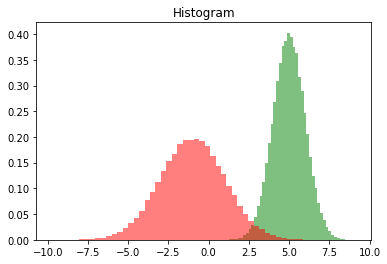

In [120]:

samplesource = multivariate_normal(mean=[5,-1], cov=[[1,1],[1,4]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * s2 / s1 * (x - m1), math.sqrt((1 - rho ** 2) * (s2**2))))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * s1 / s2 * (y - m2), math.sqrt((1 - rho ** 2) * (s1**2))))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 2

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)
        y = p_ygivenx(x, m1, m2, s1, s2)
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

num_bins = 50
plt.hist(x_res, num_bins, normed=1, facecolor='green', alpha=0.5)
plt.hist(y_res, num_bins, normed=1, facecolor='red', alpha=0.5)
plt.title('Histogram')
plt.show()

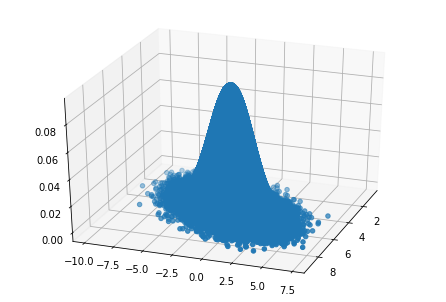

In [121]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o')
plt.show()